In [23]:
import os
import librosa
import librosa.display
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [35]:
#Locating audio files
BASE_DIR="C:/Users/User/EDD_audio/EATD-Corpus/t_5"
neu_file="neutral_out.wav"
pos_file="positive_out.wav"
neg_file="negative_out.wav"
neu_dir=(os.path.join(BASE_DIR, neu_file)).replace('\\','/')
pos_dir=(os.path.join(BASE_DIR, pos_file)).replace('\\','/')
neg_dir=(os.path.join(BASE_DIR, neg_file)).replace('\\','/')
ipd.Audio(neg_dir)

#Loading audio files using librosa
neu_lw, sr= librosa.load(neu_dir)
pos_lw, _= librosa.load(pos_dir)
neg_lw, _= librosa.load(neg_dir)

In [40]:
resampled_audio, sr = resample_audio(neu_dir)
print(f"Sample rate after Resampling: {sr}")
model_input = convert_to_model_input(resampled_audio, target_length=16000)
print(f"Model input shape: {model_input.shape}")

Sample rate after Resampling: 16000
Model input shape: (16000,)


In [25]:
#Extracting STFT
FRAME_SIZE=2048
HOP_SIZE=512
S_scale= librosa.stft(neu_lw, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
#Calculating spectrogram
Y_scale=np.abs(S_scale)**2

In [26]:
#Visualising the spectrogram
def plot_spectro(Y, sr, hop_length, y_axis="linear"):
    plt.figure(figsize=(25,10))
    librosa.display.specshow(Y, sr=sr, hop_length=hop_length, x_axis="time", y_axis=y_axis)
    plt.colorbar(format="%+2.f")

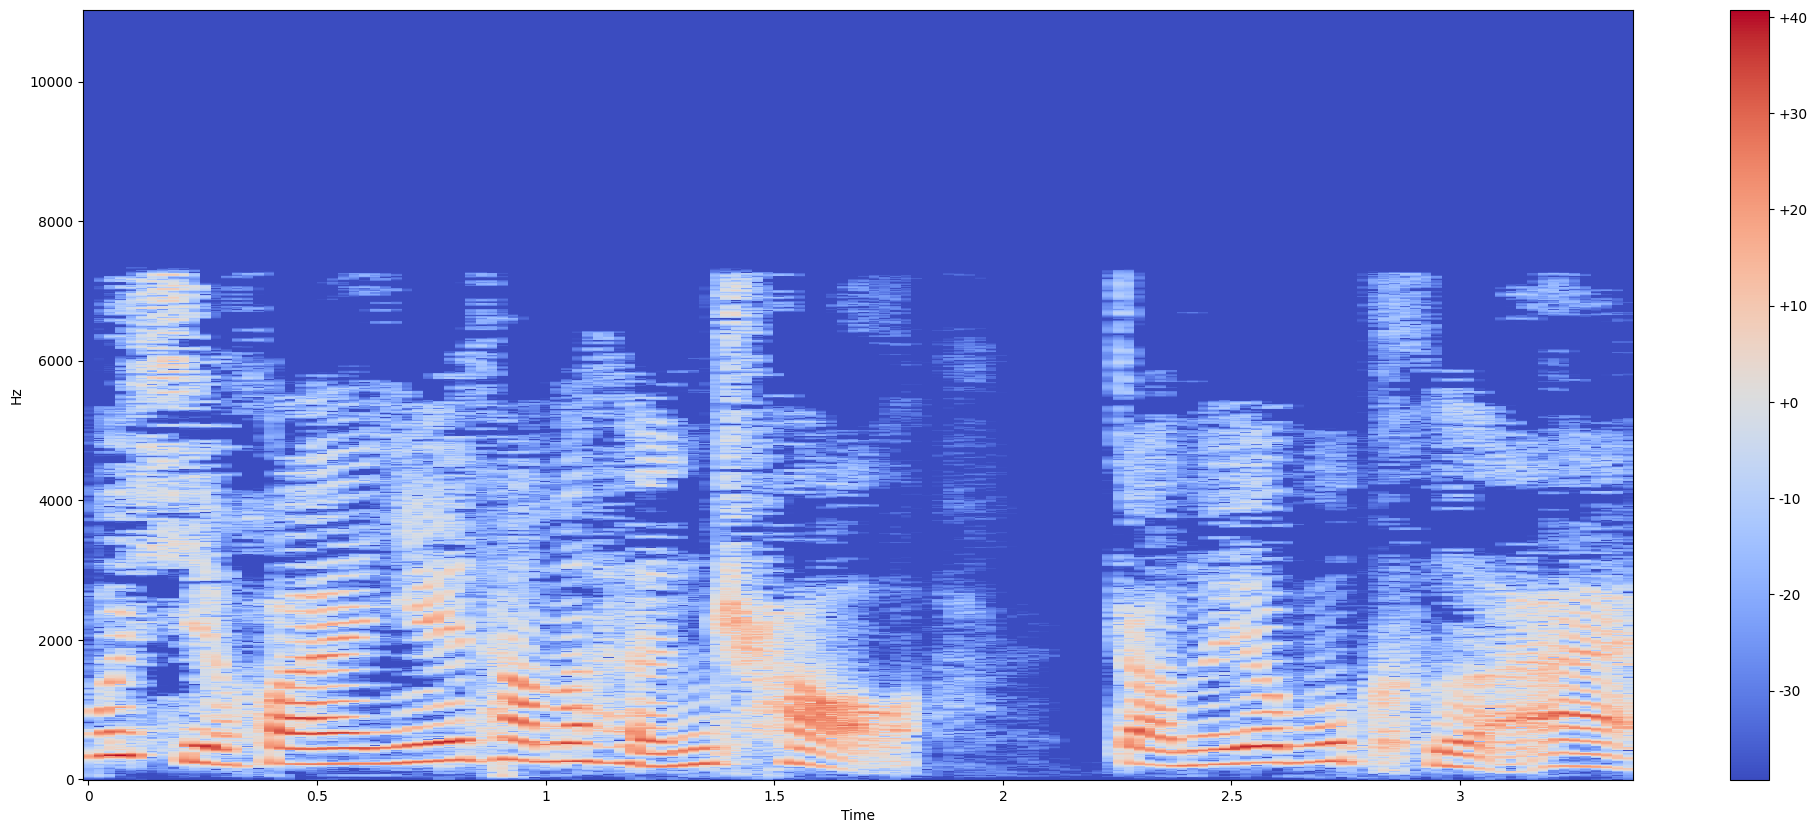

In [27]:
#Log-amplitude spectrogram
Y_log_scale= librosa.power_to_db(Y_scale)
plot_spectro(Y_log_scale, sr, HOP_SIZE)

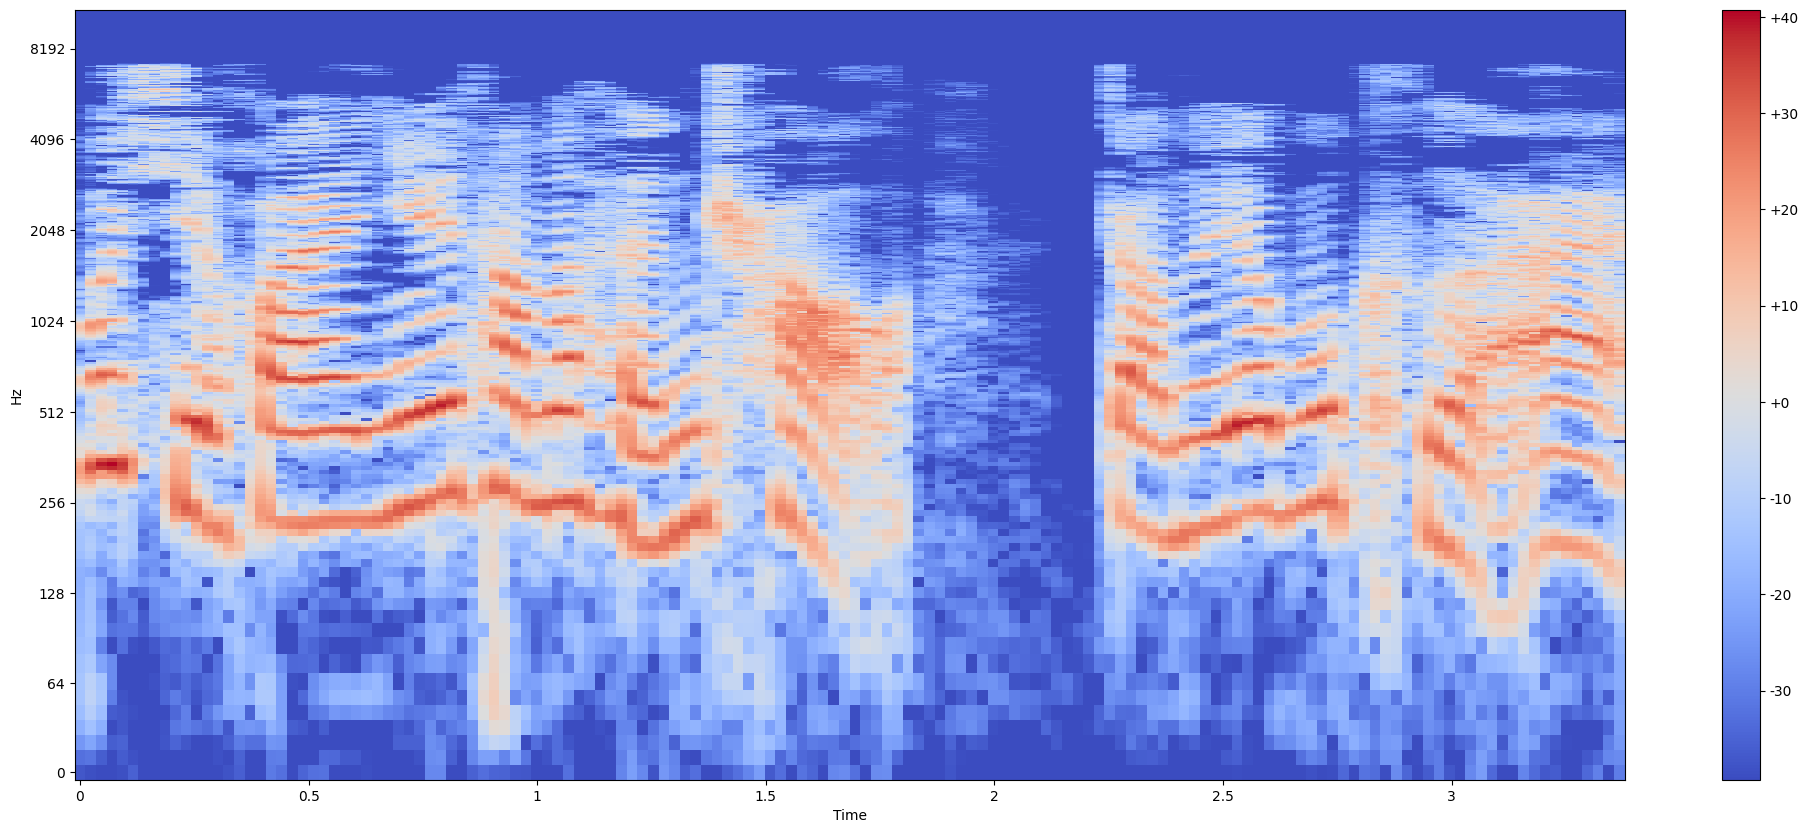

In [28]:
#Log-frequency spectrogram
plot_spectro(Y_log_scale, sr, HOP_SIZE, y_axis="log")

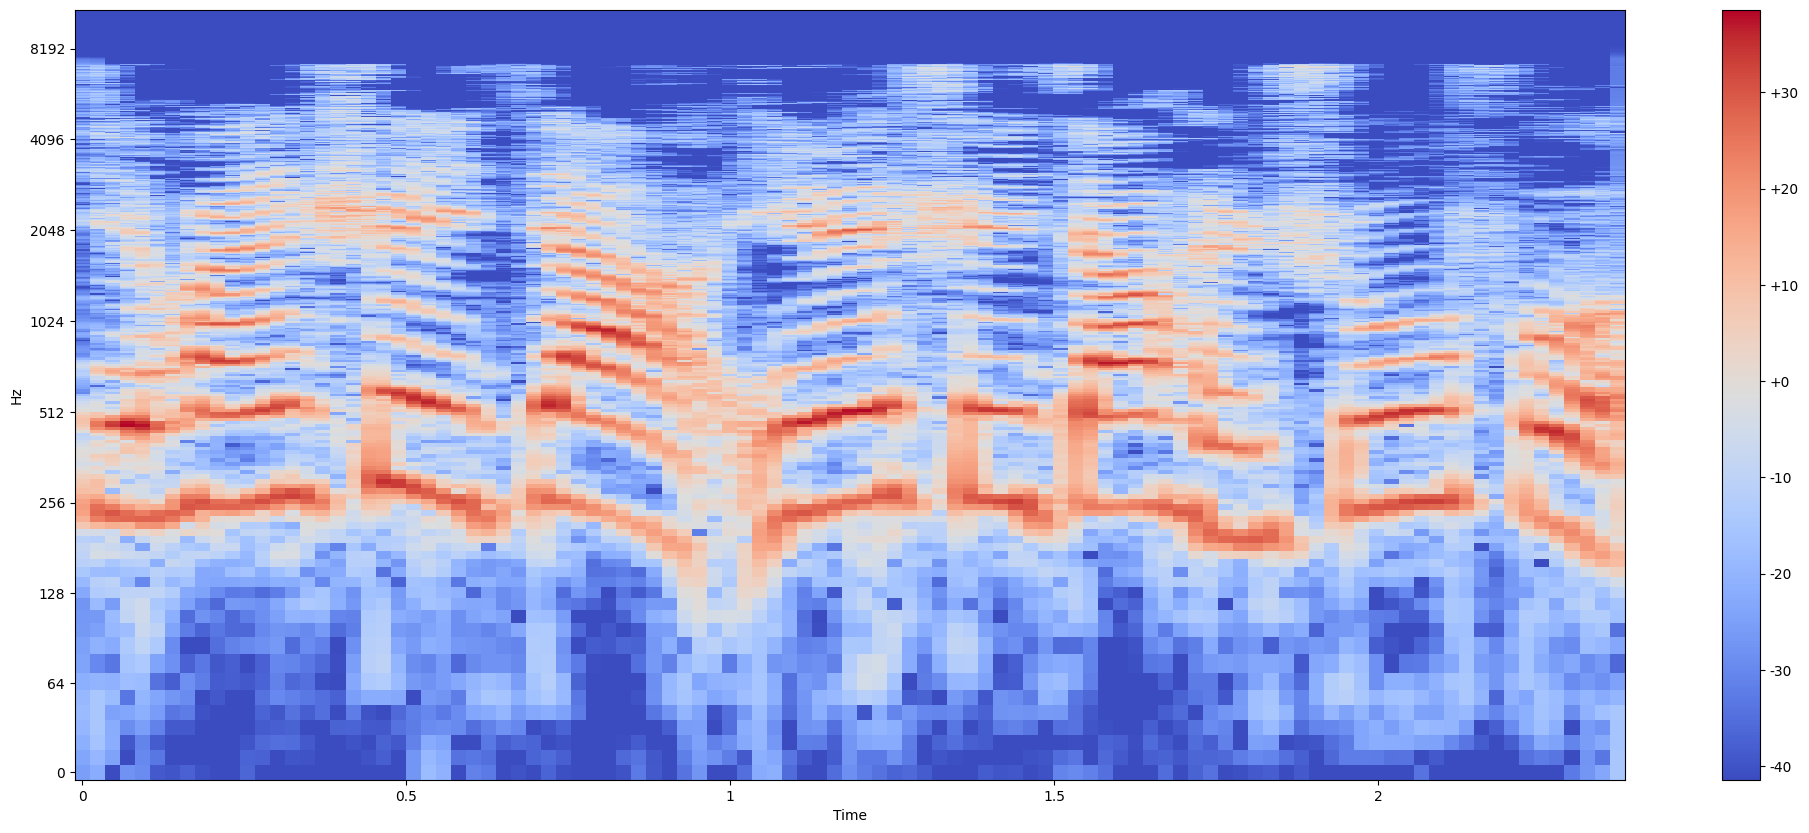

In [29]:
S_scale= librosa.stft(pos_lw, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
#Calculating spectrogram
Y_scale=np.abs(S_scale)**2
Y_log_scale= librosa.power_to_db(Y_scale)
plot_spectro(Y_log_scale, sr, HOP_SIZE, y_axis="log")

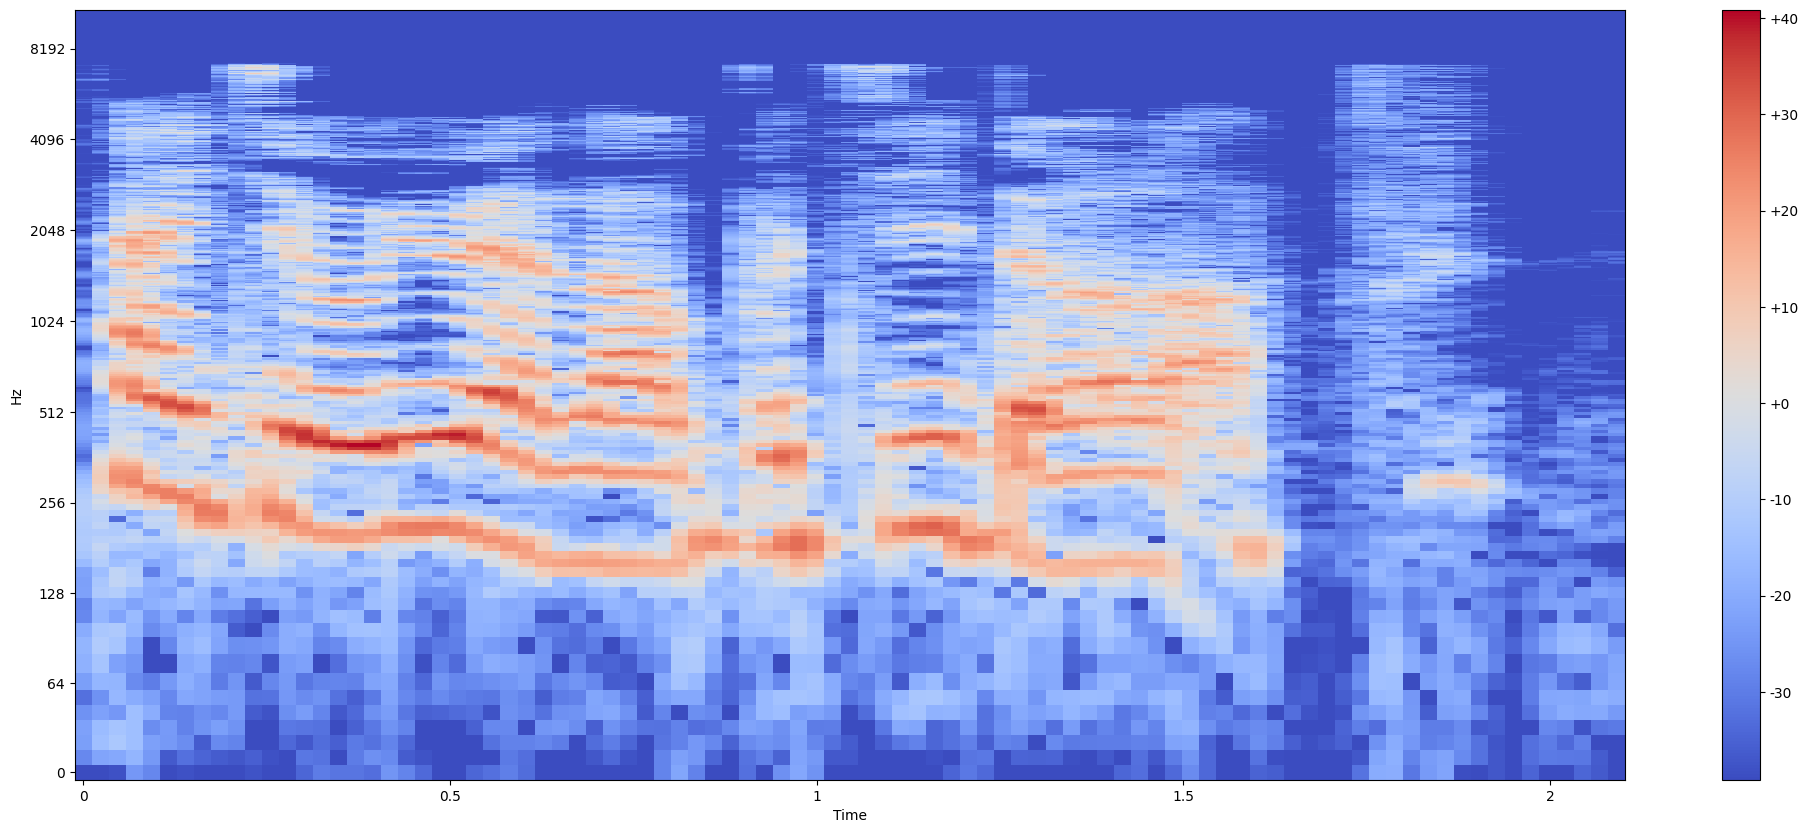

In [30]:
S_scale= librosa.stft(neg_lw, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
#Calculating spectrogram
Y_scale=np.abs(S_scale)**2
Y_log_scale= librosa.power_to_db(Y_scale)
plot_spectro(Y_log_scale, sr, HOP_SIZE, y_axis="log")